In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
thanawya = pd.read_excel("Thanawya.xlsx")

In [12]:
thanawya.head()

,seating_no,arabic_name,total_degree,degree_percent,over_all
0,1001660,محمد ابو الحسن حسن مصطفى,163.5,51.09375,Very Weak
1,1001661,محمد احمد محمد ابو زيد,187.5,58.59375,Very Weak
2,1001662,محمد على محمود عبدالعزيز,168.0,52.50000,Very Weak
3,1001663,محمود سيد انور محمد حامد,212.0,66.25000,Weak
4,1001664,محمود عطيه محمود جابر حجاج,154.0,48.12500,Failed


In [6]:
absences = thanawya[thanawya['total_degree'] == 0]
absences_num = absences['total_degree'].count()

In [7]:
thanawya['degree_percent'] = (thanawya['total_degree']/320) * 100

In [ ]:
labels = ["Failed","Very Weak","Weak","Good","Very Good", "Excellent"]
bins = [0, 50, 60, 70, 80, 90, 100]
thanawya['over_all'] = pd.cut(thanawya['degree_percent'], labels= labels, bins= bins)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810980 entries, 0 to 810979
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   seating_no      810980 non-null  int64   
 1   arabic_name     810980 non-null  object  
 2   total_degree    810980 non-null  float64 
 3   degree_percent  810980 non-null  float64 
 4   over_all        779720 non-null  category
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 25.5+ MB


In [25]:
sns.set_style("darkgrid")

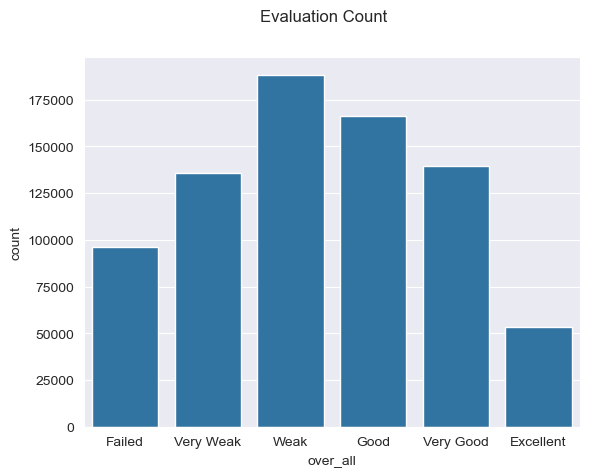

In [27]:
sns.countplot(data= thanawya, x= 'over_all').figure.suptitle("Evaluation Count")
plt.show()